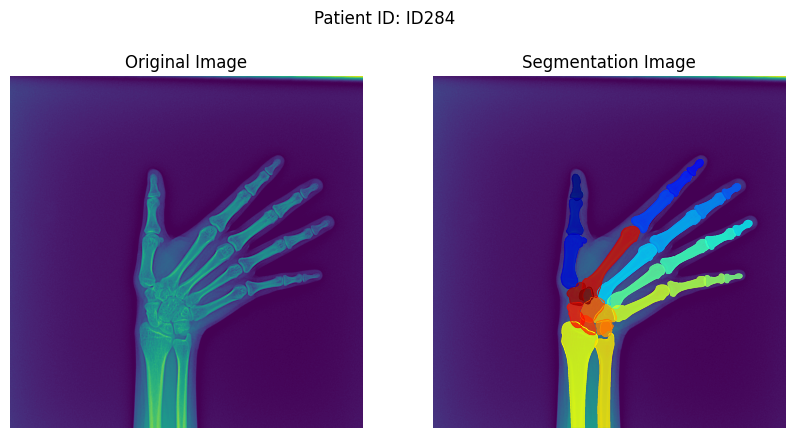

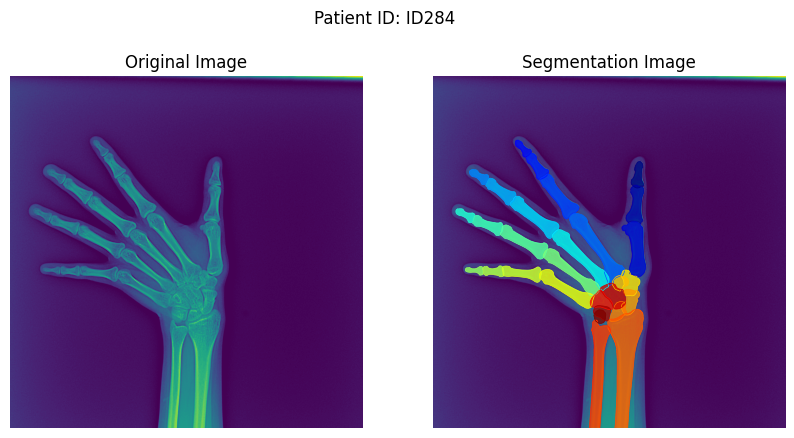

In [7]:
import os
import json
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Polygon
import numpy as np

# 이미지 파일 및 JSON 파일 경로 설정
image_dir = '/data/ephemeral/home/data/train/DCM'
json_dir = '/data/ephemeral/home/data/train/outputs_json'

# 색상 팔레트 정의
colors = plt.cm.jet(np.linspace(0, 1, 29))  # 29개의 색상 생성

def visualize_images(patient_id):
    # 선택한 환자의 이미지 파일 및 JSON 파일 로드
    patient_image_dir = os.path.join(image_dir, patient_id)
    patient_json_dir = os.path.join(json_dir, patient_id)
    
    # 오른손과 왼손에 대한 이미지 및 JSON 파일 쌍에 대해 루프 수행
    for json_file in os.listdir(patient_json_dir):
        if json_file.endswith('.json'):
            json_path = os.path.join(patient_json_dir, json_file)
            
            # 이미지 파일 이름
            image_file = f'image{json_file[5:-5]}.png'
            
            # 이미지 로드
            image_path = os.path.join(patient_image_dir, image_file)
            image = Image.open(image_path)
            
            # JSON 파일 로드
            with open(json_path, 'r') as f:
                data = json.load(f)
                
            # 색칠된 이미지 표시를 위한 subplot 생성
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            
            # 기존 이미지 표시
            axs[0].imshow(image)
            axs[0].set_title('Original Image')
            axs[0].axis('off')
            
            # 색칠된 이미지 표시
            axs[1].imshow(image)
            axs[1].set_title('Segmentation Image')
            axs[1].axis('off')
            
            # 뼈에 대한 정보 추출 및 시각화
            for i, annotation in enumerate(data['annotations']):
                label = annotation['label']
                points = annotation['points']
                x_points, y_points = zip(*points)  # x, y 좌표 분리
                
                # 뼈의 윤곽을 시각화
                axs[1].plot(x_points, y_points, color=colors[i], linewidth=0.5)
                
                # 윤곽선 내부를 채우기 위한 Polygon 생성
                polygon = Polygon(points, closed=True, edgecolor=None, facecolor=colors[i], alpha=0.8)
                axs[1].add_patch(polygon)
            
            # 환자 ID 표시
            fig.suptitle(f'Patient ID: {patient_id}')
            
            plt.show()

# 환자 ID 입력
patient_id = "ID284"
visualize_images(patient_id)


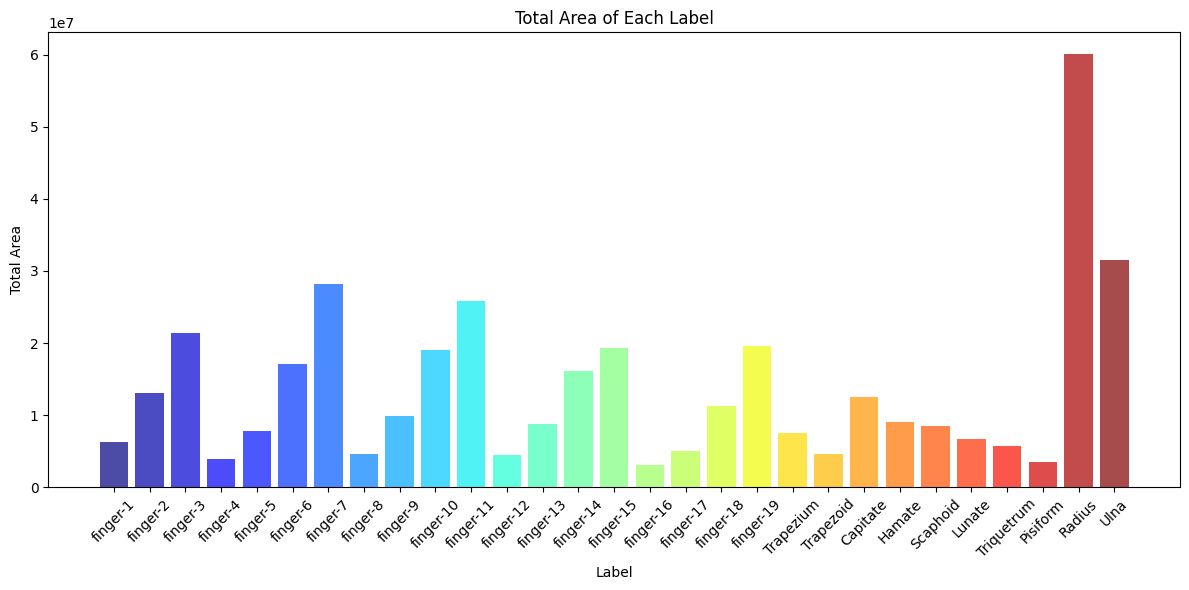

In [56]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def calculate_total_area(json_dir):
    total_area = {}

    for root, dirs, files in os.walk(json_dir):
        for file in files:
            if file.endswith('.json'):
                json_file_path = os.path.join(root, file)
                with open(json_file_path, 'r') as f:
                    data = json.load(f)

                annotations = data['annotations']
                for annotation in annotations:
                    label = annotation['label']
                    points = annotation['points']
                    area = calculate_polygon_area(points)

                    if label not in total_area:
                        total_area[label] = area
                    else:
                        total_area[label] += area

    return total_area

def calculate_polygon_area(points):
    # 다각형 넓이 구하기
    area = 0
    n = len(points)
    for i in range(n):
        x1, y1 = points[i]
        x2, y2 = points[(i + 1) % n]
        area += (x1 * y2 - x2 * y1) / 2

    return abs(area)

def plot_total_area(total_area):
    labels = list(total_area.keys())
    areas = list(total_area.values())

    # 색상 매핑
    colors = plt.cm.jet(np.linspace(0, 1, len(labels)))

    plt.figure(figsize=(12, 6))
    plt.bar(labels, areas, color=colors, alpha=0.7)  # 각 라벨에 대해 다른 색상을 사용합니다.
    plt.xlabel('Label')
    plt.ylabel('Total Area')
    plt.title('Total Area of Each Label')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# JSON 파일이 있는 디렉토리 경로
json_dir = '/data/ephemeral/home/data/train/outputs_json'

# 전체 넓이 계산
total_area = calculate_total_area(json_dir)

# 시각화
plot_total_area(total_area)
